In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice

In [3]:
# SPICE test
spice.tkvrsn('TOOLKIT')

'CSPICE_N0067'

Import JUICE Lib

In [4]:
import sys

# import JUICE lib
sys.path.append('../lib/')
import juice_spice_lib as juice_lib

Load SPICE kernels

In [5]:
# load SPICE ketnels
#source_dir = 'C:/share/Linux/doc/spice/juice/kernels/'
source_dir = '/Users/Shared/spice/juice/kernels/'

juice_lib.spice_ini(source_dir)

JUICE orbit near Earth

In [5]:
# set date/time
utctim = '2023-04-06T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*30  # number of data
dt = 60   # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_juice_pos_earth(et, x_ref='SUN')


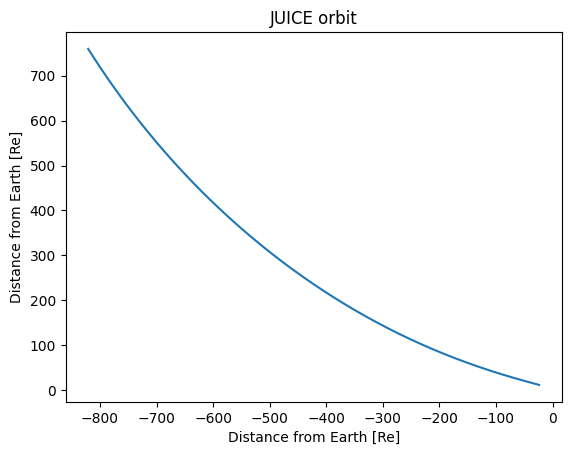

In [6]:
# plot
re = 6400.0  # km
plt.plot(x/re, y/re)
plt.title('JUICE orbit')
plt.xlabel('Distance from Earth [Re]')
plt.ylabel('Distance from Earth [Re]')
plt.show()


JUICE orbit from Earth to Jupiter

In [7]:
# set date/time
utctim = '2023-04-14T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 365*10 # number of data
dt = 60*60*24   # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_juice_pos_sun(et, x_ref='JUPITER')


In [1]:
from astropy.constants import au

# plot
au_km=au*1e-3
plt.plot(x/au_km, y/au_km)
plt.title('JUICE orbit')
plt.xlabel('Distance from Sun [A.U.]')
plt.ylabel('Distance from Sun [A.U.]')
plt.show()


NameError: name 'plt' is not defined

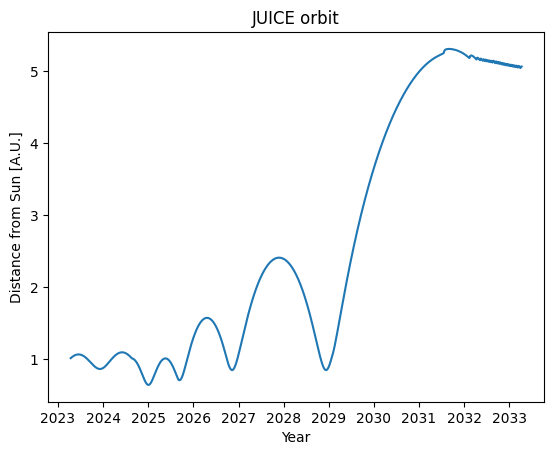

In [ ]:
# plot
td = spice.et2datetime(et)
plt.plot(td, r/au_km)
plt.title('JUICE orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Sun [A.U.]')
plt.show()

JUICE orbit around Jupiter (after JOI)

In [14]:
# set date/time
utctim = '2031-06-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*4.3  # number of data
dt = 60*60     # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_juice_pos_jup(et, x_ref='SUN')

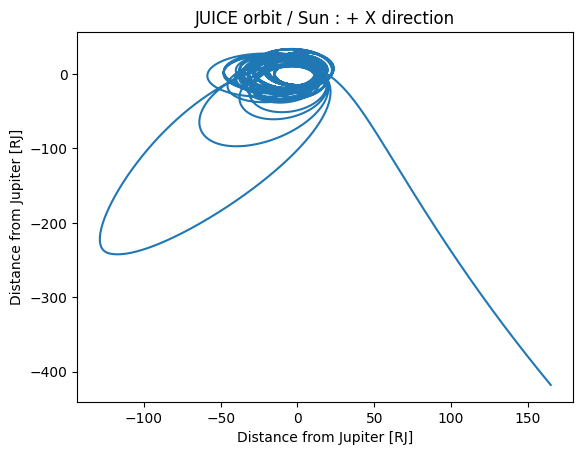

In [15]:
# plot
rj = 71400.0  # [km]
plt.plot(x/rj, y/rj)
plt.title('JUICE orbit / Sun : + X direction')
plt.xlabel('Distance from Jupiter [RJ]')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

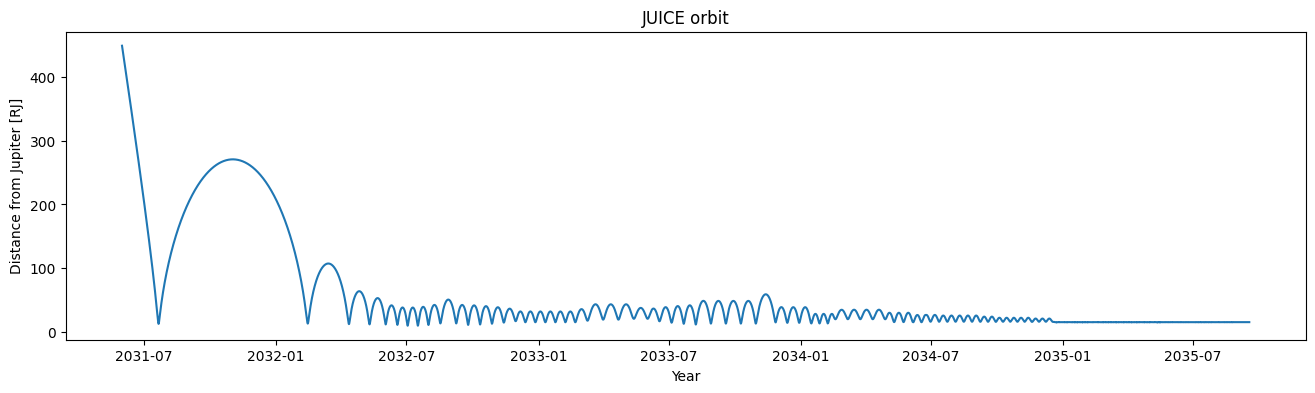

In [16]:
# plot
td = spice.et2datetime(et)
rj = 71400.0  # [km]
plt.figure(figsize=(16, 4))
plt.plot(td, r/rj)
plt.title('JUICE orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

Jupiter orbit around Ganymede (check IAU_GANYMEDE)

In [24]:
# set date/time
utctim = '2020-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 365*20   # number of data
dt = 24*60*60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUPITER', 'GANYMEDE')

Text(0, 0.5, 'longitude [deg]')

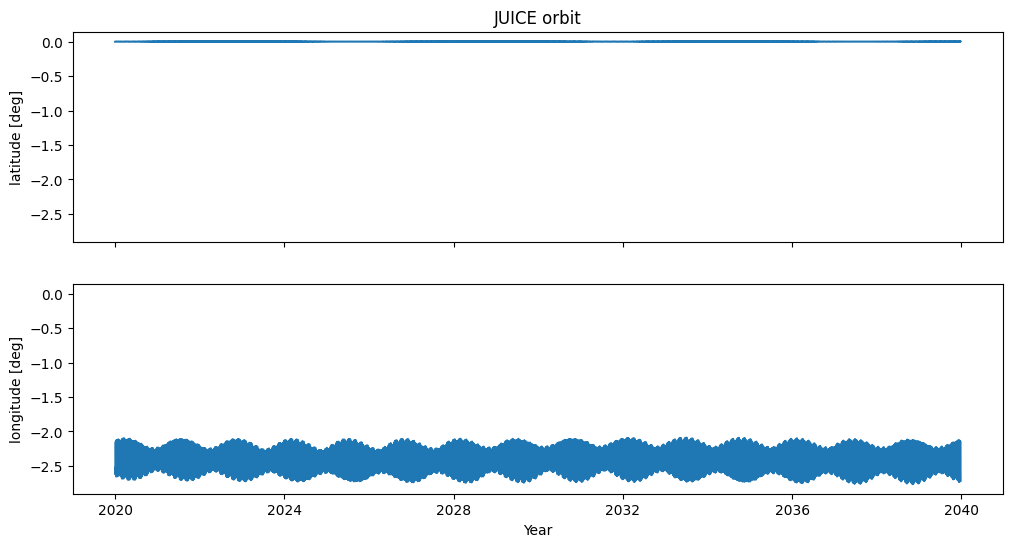

In [25]:
td = spice.et2datetime(et)

fig, (ax1, ax2) = plt.subplots(
    2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.plot(td, lat*180.0/np.pi)
ax1.set_title('JUICE orbit')
ax1.set_ylabel('latitude [deg]')

ax2.plot(td, lon*180.0/np.pi)
ax2.set_xlabel('Year')
ax2.set_ylabel('longitude [deg]')


JUICE orbit around Ganymede

In [34]:
# set date/time
utctim = '2034-11-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*30*11.2   # number of data
dt = 60*60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUICE', 'GANYMEDE')

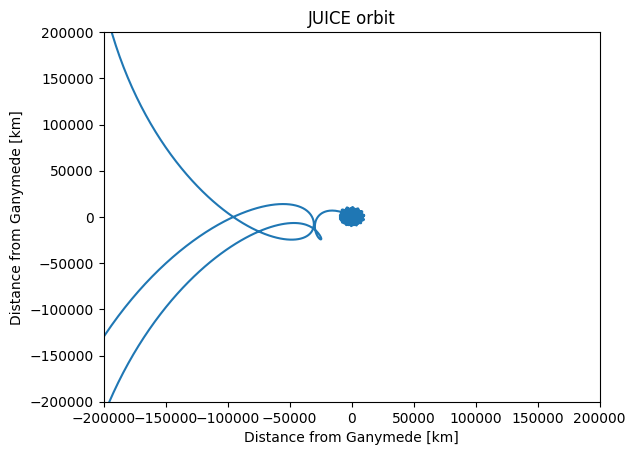

In [35]:
# plot
plt.plot(x, y)
range = 200000.0
plt.xlim(-range, range)
plt.ylim(-range, range)
plt.title('JUICE orbit')
plt.xlabel('Distance from Ganymede [km]')
plt.ylabel('Distance from Ganymede [km]')

plt.show()

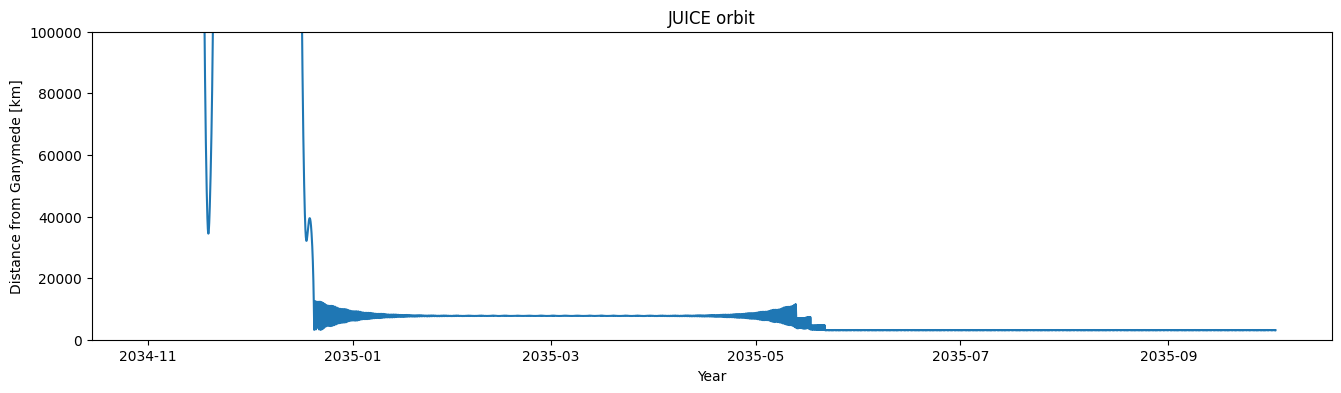

In [36]:
# plot
td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r)
plt.ylim(0.0, 100000.0)
plt.title('JUICE orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Ganymede [km]')
plt.show()

JUICE orbit close to Ganymede

In [37]:
# set date/time
utctim = '2034-12-15T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*30*5   # number of data
dt = 60            # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUICE', 'GANYMEDE')

Text(0, 0.5, 'Z distance from Ganymede [Rg]')

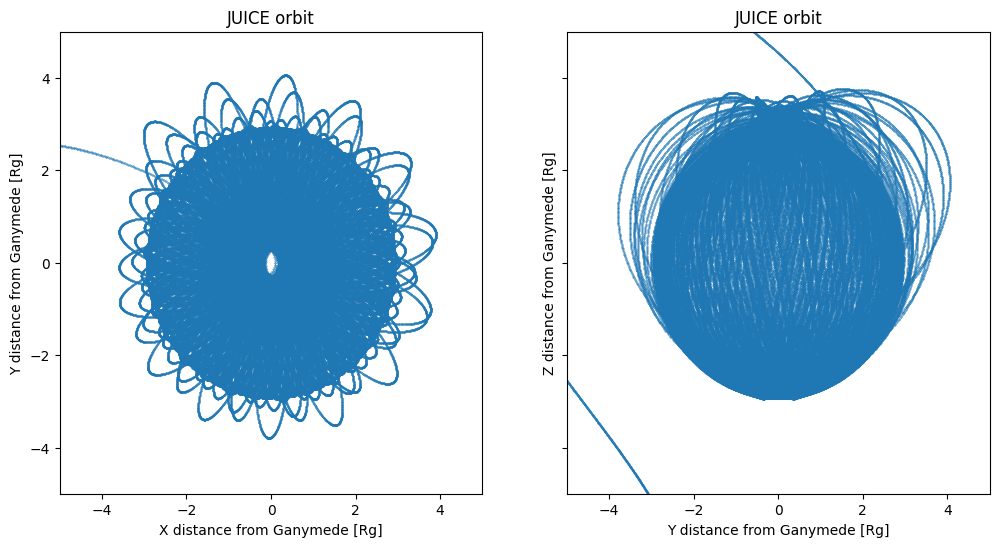

In [ ]:
rg = 2634.1 # [km]
idx = np.where(r<20000.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.scatter(x/rg, y/rg, s=0.1)
range = 5.0
ax1.set_xlim(-range, range)
ax1.set_ylim(-range, range)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X distance from Ganymede [Rg]')
ax1.set_ylabel('Y distance from Ganymede [Rg]')

ax2.scatter(y/rg, z/rg, s=0.1)
range = 5.0
ax2.set_xlim(-range, range)
ax2.set_ylim(-range, range)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y distance from Ganymede [Rg]')
ax2.set_ylabel('Z distance from Ganymede [Rg]')

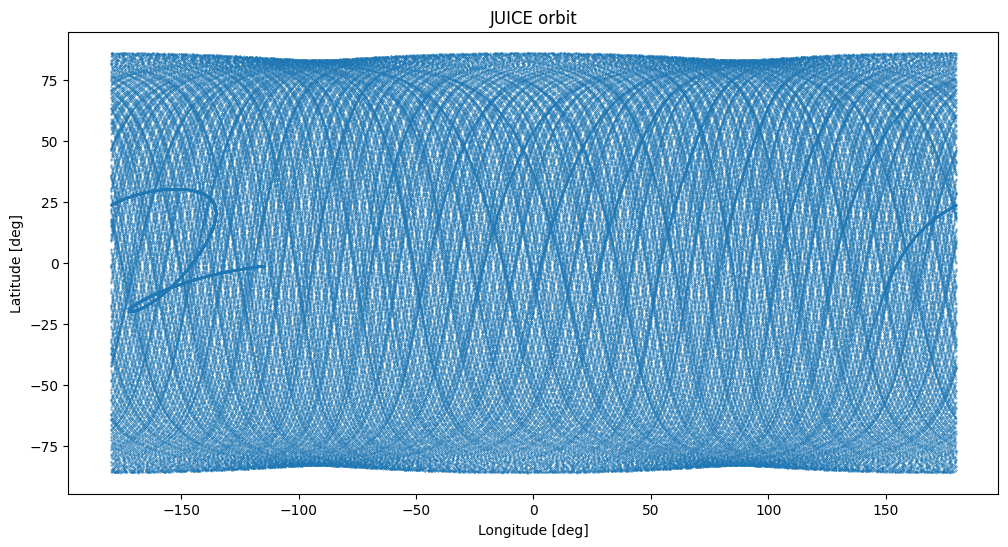

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(lon*180.0/np.pi, lat*180.0/np.pi,s=0.1)
plt.title('JUICE orbit')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.show()

In [ ]:
# set date/time
utctim = '2035-05-20T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*120   # number of data
dt = 60            # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_GANYMEDE', 'JUICE', 'GANYMEDE')


Text(0, 0.5, 'Z distance from Ganymede [Rg]')

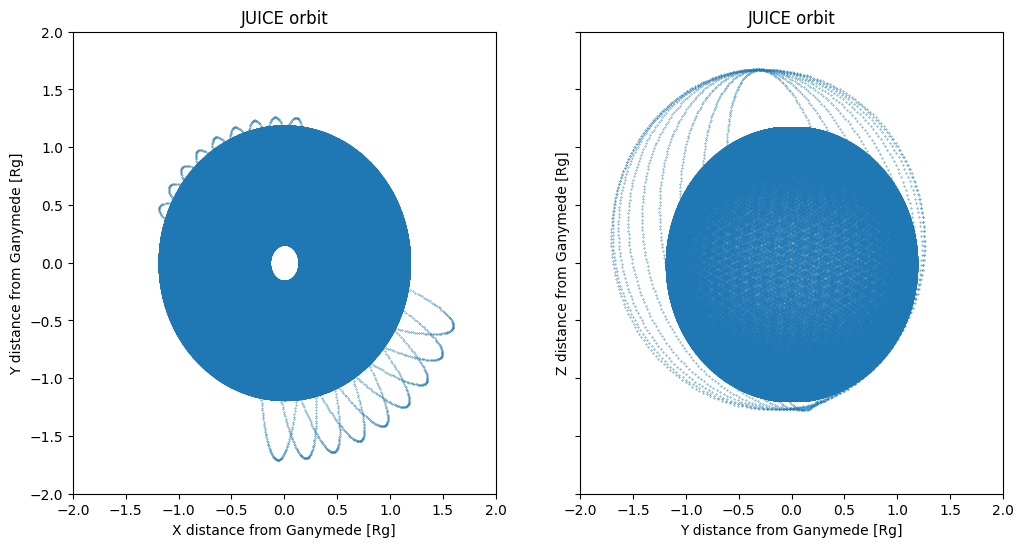

In [ ]:
rg = 2634.1  # [km]
idx = np.where(r < 20000.0)

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.scatter(x/rg, y/rg, s=0.1)
range = 2.0
ax1.set_xlim(-range, range)
ax1.set_ylim(-range, range)
ax1.set_title('JUICE orbit')
ax1.set_xlabel('X distance from Ganymede [Rg]')
ax1.set_ylabel('Y distance from Ganymede [Rg]')

ax2.scatter(y/rg, z/rg, s=0.1)
range = 2.0
ax2.set_xlim(-range, range)
ax2.set_ylim(-range, range)
ax2.set_title('JUICE orbit')
ax2.set_xlabel('Y distance from Ganymede [Rg]')
ax2.set_ylabel('Z distance from Ganymede [Rg]')


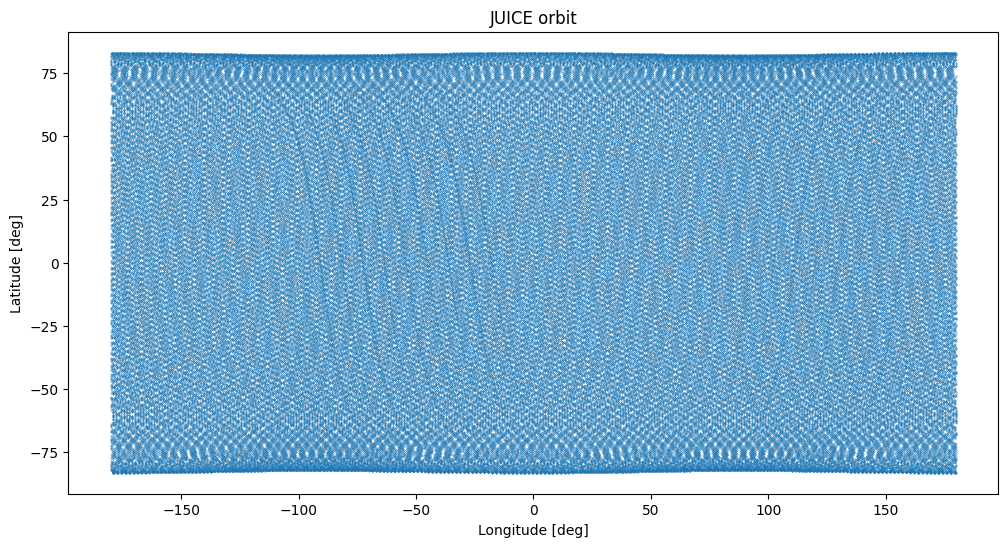

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(lon*180.0/np.pi, lat*180.0/np.pi, s=0.1)
plt.title('JUICE orbit')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.show()
